<a href="https://colab.research.google.com/github/mevangelista-alvarado/machine_learning/blob/main/KNN_primer_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

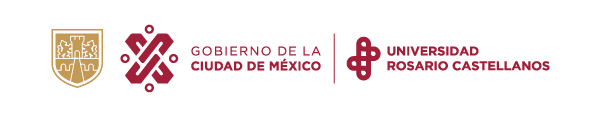

**Actualizado:** Noviembre de 2023

**Autor:** Miguel Evangelista ([@mevagelista-alvarado](https://github.com/mevangelista-alvarado))

## Introducción

En este Google Colab mostramos una implementación de K-vecinos próximos en un ejemplo simple en Python.   

## K-vecinos proximos (KNN)

### Introducción

El inicio del modelo KNN se atribuye a E. Fix y J. Hodges. por su trabajo [Discriminatory Analysis: Nonparametric Discrinination: Consistency Properties](https://apps.dtic.mil/sti/pdfs/ADA800276.pdf) de 1951  

Mientras que el nombre KNN se le atribuye a T. Coveren su trabajo [Nearest Neighbor Pattern Classification](https://isl.stanford.edu/~cover/papers/transIT/0021cove.pdf) en 1967.

Su idea principal es asignar una etiqueta a un punto de datos basándose en las etiquetas de los puntos de datos vecinos más cercanos.



### K-vecinos próximos (KNN)

El algoritmo de k-vecinos próximos, también conocido como KNN por sus siglas en ingles _K-Nearest Neighbors_, es un algoritmo de aprendizaje supervisado, que utiliza la proximidad para hacer clasificaciones o predicciones.

Generalmente se usa como un algoritmo de clasificación.

### Estructura de los KNNs

Los aspectos más importantes de un KNN, son los siguientes:


* __Vecinos más cercanos:__  
  Se utiliza el concepto de distancia (métrica) para determinar qué puntos son los vecinos más cercanos, comúnmente la distancia utilizada es la euclidiana.
    
  **Remark**
    
  En la sección métricas se muestran a detalle algunas de las distancias comúnes.


* __Parámetro k:__  
 El parámetro $k$ es un número entero positivo que se elige antes de aplicar el algoritmo.

 Representa la cantidad de vecinos más cercanos que se tendrán en cuenta al tomar una decisión.

 Si $k = 1$, se toma la etiqueta del vecino más cercano; si $k > 1$, se realiza una votación entre los k vecinos para determinar la etiqueta.



* __Clasificación:__  
 En el caso de clasificación, cada vecino __vota__ por su etiqueta de clase. La etiqueta que obtiene más votos entre los k vecinos se asigna al punto de datos en cuestión.



* __Regresión:__  
  En el caso de regresión, en lugar de votar por una etiqueta de clase, los vecinos contribuyen con sus valores de salida.
  
  La salida para el punto de datos en cuestión se calcula tomando el promedio ponderado de las salidas de los $k-$ vecinos.



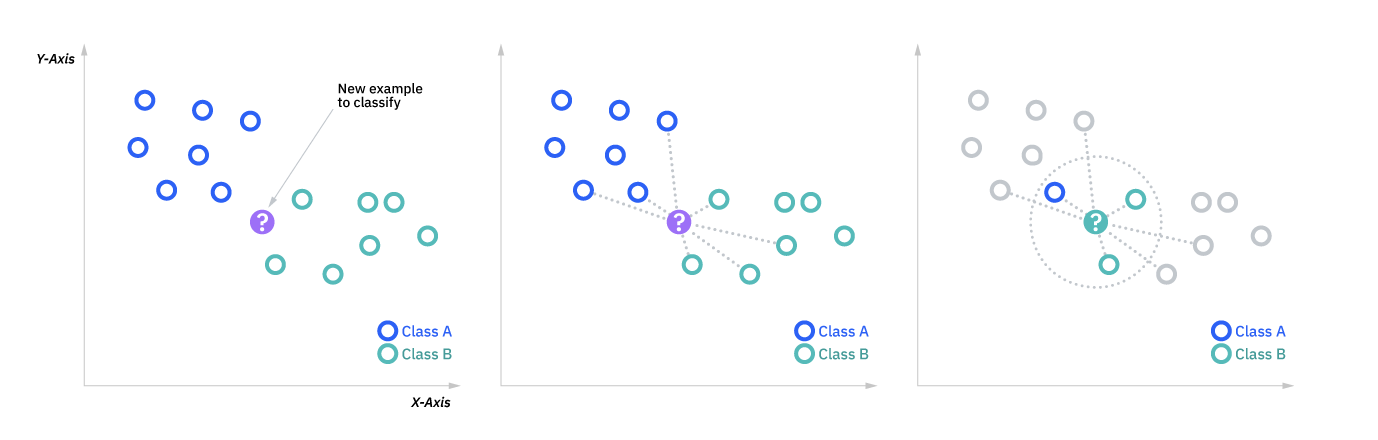

### Consideraciones.


* __Escala de características:__  
 Es importante normalizar o estandarizar las características para evitar que las características con mayores escalas dominen la contribución al cálculo de la distancia.

* __Impacto del parámetro k:__  
 Valores pequeños de $k$ pueden ser sensibles al ruido, mientras que valores grandes pueden suavizar demasiado las decisiones.

## Métricas

Para determinar qué puntos de datos están más cerca de un punto de consulta determinado, será necesario calcular la distancia entre el punto de consulta y los otros puntos de datos.

####Euclideana

La distancia _euclideana_ entre dos puntos $P=(p_1,...,p_n)$ y $Q=(q_1, ...,q_n)$ en un espacio n-dimensional $R^{n}$ se calcula como la raíz cuadrada de la suma de las diferencias al cuadrado,
  $$d_{E}(P,Q)=\sqrt {(p_{1}-q_{1})^{2}+\cdots+(p_{n}-q_{n})^{2}}.$$

#### Manhattan

La distancia Manhattan $d_{1}$ (también conocida como la distancia del taxista) entre dos vectores $P=(p_1,...,p_n)$ y $Q=(q_1, ...,q_n)$ en un espacio n-dimensional $R^{n}$ es la suma de las longitudes de las proyecciones del segmento de línea entre los puntos sobre el sistema de ejes coordenados,

$$d_{1}(P, Q) = \sum_{i=1}^{n}|p_{i}-q_{i}|$$

**Remark**.  

El espacio necesita un sistema de coordenadas cartesianas fijo.

#### Minkowski

Esta distancia puede considerarse una generalización de las distancia Euclideana y Manhattan.  

Para dos puntos $P=(p_1,...,p_n)$ y $Q=(q_1, ...,q_n)$ en un espacio n-dimensional $R^{n}$ viene definida por la siguiente expresión:

$$d_{M}(P, Q) = \big(\sum_{i=1}^{n}|p_{i}-q_{i}|^{m}\big)^{\frac{1}{m}}$$

**Remark**.  

Para $m = 1$, la expresión anterior coincide con la distancia Manhattan, y que para $m = 2$, coincide con la distancia Euclidea.

####Hamming

## Distancia de Hamming

La distancia de Hamming es una medida de la diferencia entre dos secuencias de igual longitud.

La fórmula para calcular la distancia de Hamming entre dos cadenas de igual longitud `s1` y `s2` es la siguiente:

$$d_H(s_1, s_2) = \sum_{i=1}^{n} \delta(s_{1i}, s_{2i})$$

donde:
-  $n$ es la longitud de las cadenas.
-  $s_{1i}$ y $s_{2i}$ son los símbolos en la posición $i$ de las cadenas $s_1$ y $s_2$, respectivamente.
- $\delta$ es la función delta de Kronecker,
  * $0$ si $s_{1i} = s_{2i}$ (es decir, los símbolos son iguales) y
  * $1$ si $s_{1i} \neq s_{2i}$ (es decir, los símbolos son diferentes).

En términos más sencillos, la distancia de Hamming cuenta el número de lugares en los que las dos cadenas difieren.




**Ejemplo:**

Supongamos que tenemos dos cadenas binarias:
- $s_1$ = `1011101`
- $s_2$ = `1001001`

La distancia de Hamming entre estas dos cadenas sería:

$$d_H(s_1, s_2) = \delta(1,1) + \delta(0,0) + \delta(1,0) + \delta(1,0) + \delta(1,0) + \delta(0,0) + \delta(1,1) = 2$$

Por lo tanto, la distancia de Hamming entre $s_1$ y $s_2$ es $2$.

### Ejemplo de KNN

Supongamos que tenemos un conjunto de datos (puntos) con dos características y dos clases posibles: $Rojo$ y $Azul$.


**Datos de entrenamiento:**

1. Punto $A=(2, 3)$ - Clase $Rojo$
2. Punto $B=(5, 4)$ - Clase $Rojo$
3. Punto $C=(9, 6)$ - Clase $Azul$
4. Punto $D=(6, 1)$ - Clase $Azul$

Ahora, queremos clasificar un nuevo punto $E=(7, 3)$.

Vamos a utilizar KNN con $k = 3$, es decir, consideraremos los tres vecinos más cercanos.

**Paso 1:** Calcular distancias.
  
Calculemos la distancia euclidiana entre el punto $E$ y los puntos de entrenamiento:

- $d_{E}(E, A) = \sqrt{(7-2)^2 + (3-3)^2} = \sqrt{25} = 5$
- $d_{E}(E, B) = \sqrt{(7-5)^2 + (3-4)^2} = \sqrt{5} = 2.24$
- $d_{E}(E, C) = \sqrt{(7-9)^2 + (3-6)^2} = \sqrt{13} = 3.61$
- $d_{E}(E, D) = \sqrt{(7-6)^2 + (3-1)^2} = \sqrt{5} = 2.24$

**Paso 2:** Seleccionar los k vecinos más cercanos.

Al ser $k = 3$, seleccionamos los tres vecinos más cercanos, que son $B$, $D$ y $A$.

**Paso 3:** Votación para clasificación.

De los vecinos seleccionados, observamos las clases:

- Vecino B: Clase $Rojo$
- Vecino C: Clase $Azul$
- Vecino D: Clase $Azul$

En este caso, hay dos votos para la Clase $Azul$ y uno para la Clase $Rojo$.  

Por lo tanto, según la votación de los k vecinos más cercanos, clasificaríamos el punto $E$ como Clase $Azul$.


### Ejemplo de implementación de un KNN en `Python`

Este código implementa el algoritmo KNN (k-Vecinos próximos) de forma básica en Python.

#####Función `distancia_euclidiana`

In [ ]:
import math

def distancia_euclidiana(punto1, punto2):
    """Calcula la distancia euclidiana entre dos puntos en un espacio bidimensional."""
    return math.sqrt((punto1[0] - punto2[0])**2 + (punto1[1] - punto2[1])**2)

Esta función toma dos puntos en un espacio bidimensional (representados como tuplas con dos coordenadas $x$ e $y$) y calcula la distancia euclidiana entre ellos.

#####Función `knn`

In [ ]:
def knn(puntos_entrenamiento, punto_nuevo, k):
    """Implementación básica del algoritmo k-NN."""
    # Calcular distancias entre el punto nuevo y todos los puntos de entrenamiento
    distancias = [(i, distancia_euclidiana(punto_nuevo, punto)) for i, punto in enumerate(puntos_entrenamiento)]

    # Ordenar las distancias y seleccionar los k vecinos más cercanos
    vecinos_cercanos = sorted(distancias, key=lambda x: x[1])[:k]

    # Realizar la votación para clasificación
    votos = {'Clase Rojo': 0, 'Clase Azul': 0}
    for indice, _ in vecinos_cercanos:
        clase_punto = puntos_entrenamiento[indice][2]  # La tercera coordenada es la clase
        votos[clase_punto] += 1

    # Devolver la clase con más votos
    return max(votos, key=votos.get)

Esta función es una implementación básica del algoritmo KNN.

* Parámetros:
  * `puntos_entrenamiento`: una lista de puntos de entrenamiento con sus clases,
  * `punto_nuevo`: el punto que queremos clasificar, y
  * `k`: el número de vecinos más cercanos a considerar.

* Calcula la distancia euclidiana entre el `punto_nuevo` y todos los puntos de entrenamiento, almacenando los resultados en una lista llamada distancias. Cada elemento de esta lista es una tupla que contiene el índice del punto en `puntos_entrenamiento` y su distancia al `punto_nuevo`.

* Ordena la lista distancias en función de las distancias y selecciona los primeros `k` elementos. Estos son los vecinos más cercanos.

* Realiza una votación simple para determinar la clase del `punto_nuevo`. Cuenta cuántos vecinos pertenecen a cada clase y elige la clase con más votos.

* Devuelve la clase predicha para el `punto_nuevo`.

#####Definición de puntos de entrenamiento:

In [ ]:
# Puntos de entrenamiento: (x, y, clase)
puntos_entrenamiento = [
    (2, 3, 'Clase Rojo'),
    (5, 4, 'Clase Rojo'),
    (9, 6, 'Clase Azul'),
    (6, 1, 'Clase Azul')
]

Se define una lista llamada `puntos_entrenamiento` que contiene algunos puntos con sus respectivas coordenadas $x$, $y$ y clases.

#####Definición del punto nuevo y valor de `k`:

In [ ]:
# Punto nuevo a clasificar
punto_nuevo = (7, 3)

# Valor de k
k = 3

Se define un nuevo punto llamado `punto_nuevo` que queremos clasificar. Además, se define el valor de `k`

#####Aplicación de KNN

In [ ]:
# Aplicar KNN
clase_predicha = knn(puntos_entrenamiento, punto_nuevo, k)

# Imprimir el resultado
print(f"El punto {punto_nuevo} es clasificado como {clase_predicha}.")

Se aplica la función `knn` al `punto_nuevo` con el conjunto de entrenamiento y el valor de `k` especificados.